# Шаг 1. Знакомство с данными и предобработка

**Наименование исследования:** "Анализ причин оттока клиентов сети фитнес-центров «Культурист-датасаентист»"

- **Цель исследования:** с помощью имеющихся данных предоставить рекомендацию руководству компании о причинах оттока клиентов, а также, предоставить обоснованные рекомендации, направленные на увеличение количества постоянных клиентов сети

- **Задачи исследования:** с помощью анализа данных и методов машинного обучения построить модель, прогнозирующую отток клиентов, а также, провести анализ и выявить основные причины потерь прибыли сетью фитнес-центров

"Легенда" к данным:
Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент, в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- ' Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler                                    
from sklearn.model_selection import train_test_split                                
from sklearn.linear_model import LogisticRegression                                
from sklearn.metrics import roc_auc_score                                           
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv', sep=',')
data.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2781,1,1,0,0,1,1,1,30,185.701699,1.0,1,2.150959,2.173061,0
3825,1,1,0,0,1,1,0,28,32.029892,1.0,15,3.731020,3.809600,0
2605,1,0,0,0,1,1,0,31,290.594473,1.0,1,3.078771,3.151323,0
528,1,1,1,1,1,12,0,29,205.985294,12.0,4,4.077632,3.896860,0
1837,0,1,0,0,1,1,0,29,99.245578,1.0,1,1.357434,1.199090,1
2729,1,0,1,0,1,1,0,25,51.431734,1.0,4,0.854321,0.328792,1
2657,0,1,0,0,1,1,1,26,3.326196,1.0,0,2.220491,2.060425,1
3746,1,1,0,1,1,1,1,32,83.808096,1.0,3,2.176718,2.203311,0
3458,0,0,0,0,1,12,0,28,252.160476,12.0,5,1.956313,2.119239,0
3653,0,1,0,0,1,6,1,30,77.146346,6.0,3,3.211115,3.086580,0


Проверим типы данных:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

С типами данных все хорошо. Немного "выбивается" 6 знаков после запятой в некоторых столбцах, но поскольку нельзя гарантированно сказать, что нам не нужна такая точность, как-то округлять или менять тип на int не склоняюсь. В столбце, который содержит количество месяцев до окончания договора методом unique() "дробных" значений замечено не было, переведем его в int для удобства восприятия

In [4]:
data['Month_to_end_contract'] = data['Month_to_end_contract'].astype('int')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Проверим пропуски и дубликаты:

In [6]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [7]:
data.duplicated().sum()

0

Дубликаты и пропуски не обнаружены

Названия столбцов написаны не змеиным регистром, что не очень хорошо (точнее, не всех столбцов). Целесообразно поправить:

In [8]:
data.columns = data.columns.str.lower()
display(data.columns.tolist())

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

**Вывод:** трудоемкая предобработка данных не потребовалась. Из недочетов в данных можно выделить только немного "некрасивое" наименование столбцов, а также, тип данных float, где фактически использовались целые значения.

# Шаг 2. Исследовательский анализ данных

## 2.1. Изучение средних значений и стандартных отклонений

In [9]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Основные тезисы по итогам изучения средних значений:**
- по гендерному признаку количество клиентов примерно равное
- для 84% клиентов фитнес-клуб имеет территориально удобное расположение 
- без малого 50% клиентов являются сотрудниками компании-партнёра клуба
- акция «приведи друга» принесла клубу 30% клиентов от общего числа
- подавляющее большинство клиентов (90%) готовы оставить свой контактный телефон
- средний возраст клиента составляет 29 лет
- "лайфтайм" составляет 3,7 месяца
- длительность абонемента составляет 4,68 месяца
- до окончания договора в среднем 4,3 месяца
- 41% клиентов посещает групповые занятия
- среднее количество посещений клуба в неделю составляет "почти" 2 раза (1,87)
- если оценивать количество еженедельных посещений в разрезе прошлого месяца - чуть меньше (1,76)
- средний чек на дополнительные услуги составляет 147 (вероятнее всего долларов, в аннотации валюта не указана)
- отток за рассмотренный период (месяц) составил 26%

"Из ряда вон выходящее значение" стандартного отклонения наблюдается в столбце avg_additional_charges_total - 96,3. В остальных разброс значений от 0.3 до 4

Для удобства или возможного повторного исследования можно собрать требуемые параметры в отдельной переменной:

In [10]:
mean_and_std = data.agg(['mean','std'])
mean_and_std

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521


## 2.2. Изучение средних значений признаков в двух группах

In [11]:
outflow_mean = data.groupby('churn').mean()
outflow_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


**Основные тезисы:**
- нет связи между полом клиента и фактом его удержания/оттока - уходят половну как мужчин, так и женщин
- клиенты, фитнес-центр для которых территориально удобен уходят реже
- отток среди тех, кто пришел по партнерской программе составил 35%
- отток среди тех, кто пришел по рекомендации действующих клиентов составил 18%
- нет связи оттока и предоставлением номера телефона, показатели одинаковые - 90% у обоих групп
- у многих покинувших клуб клиентов срок договора был менее 2-х месяцев. Закрадывается мысль, что пролонгация им не была интересна
- среди ушедших было значительно более худшее посещение групповых занятий, почти в 2 раза реже по сравнению с действующими клиентами
- возраст ушедших клиентов на 3 года моложе оставшихся (но в целом из одной категории)
- дополнительные услуги более охотно приобретаются действующими клиентами (158 против 115)
- у ушедших клиентов в среднем договор истекает в течение 1,5 месяцев
- люди покидают зал спустя менее месяца с момента обращения (лайфтайм). Возможно, какой-то компонент деятельности "негативно" влияет на новичков
- те клиенты, что ушли ходили реже, чем постоянные клиенты
- частота посещений в разрезе месяца у ушедших клиентов была в 2 раза реже

## 2.3. Построение столбчатых гистограмм и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [12]:
current_clients = data.query('churn == 0')
departed_clients = data.query('churn == 1')

In [13]:
data_hist = data.drop(columns =(['gender', 'near_location', 
                              'partner','promo_friends', 'phone',
                              'group_visits', 'contract_period', 'churn'])).columns
data_hist

Index(['age', 'avg_additional_charges_total', 'month_to_end_contract',
       'lifetime', 'avg_class_frequency_total',
       'avg_class_frequency_current_month'],
      dtype='object')

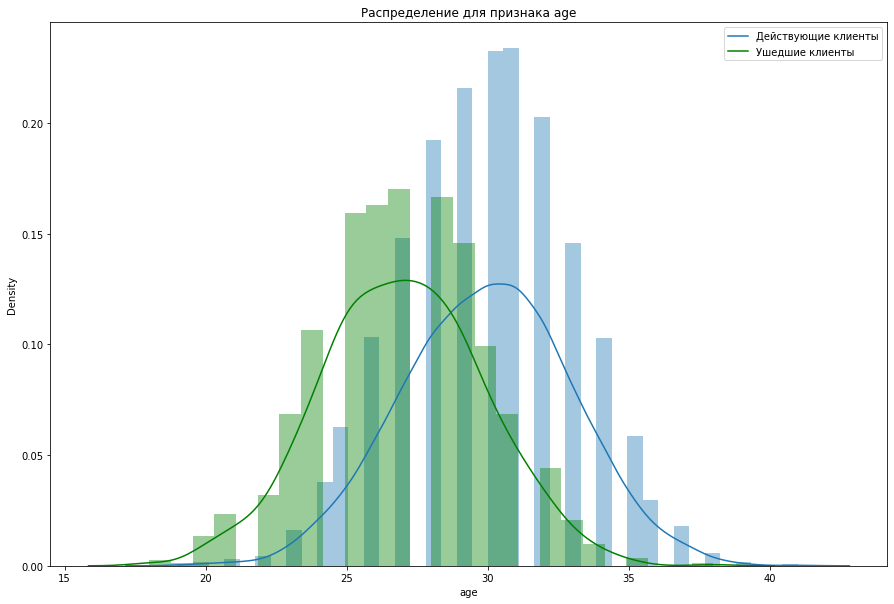

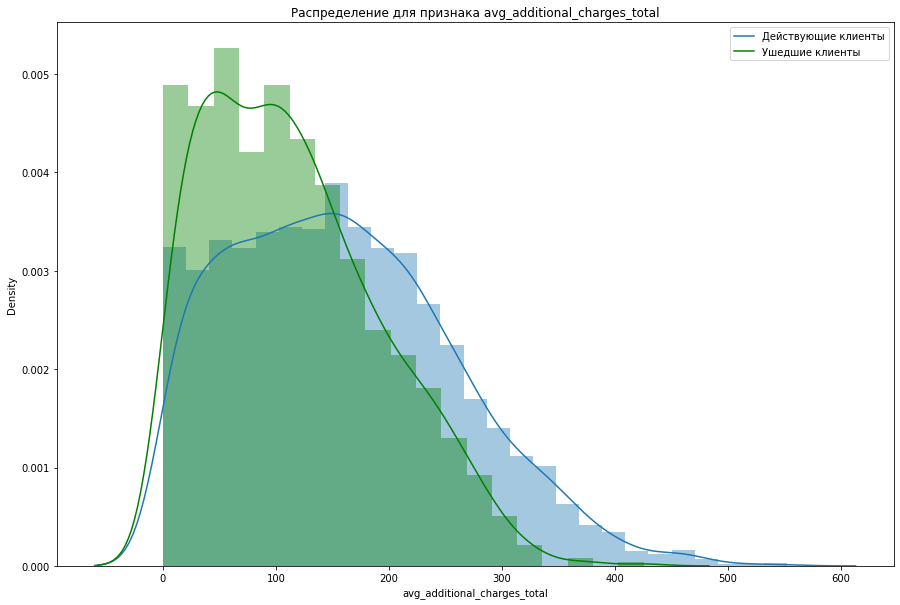

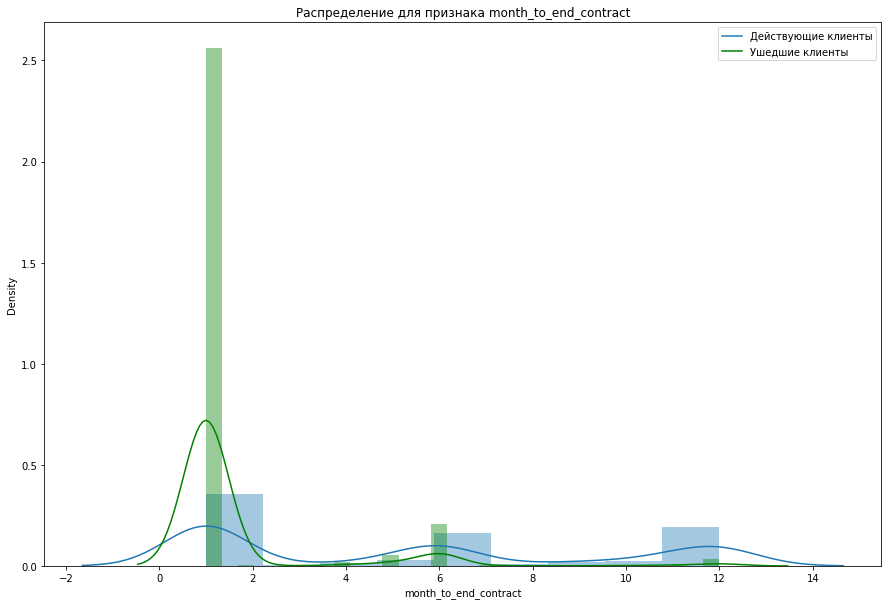

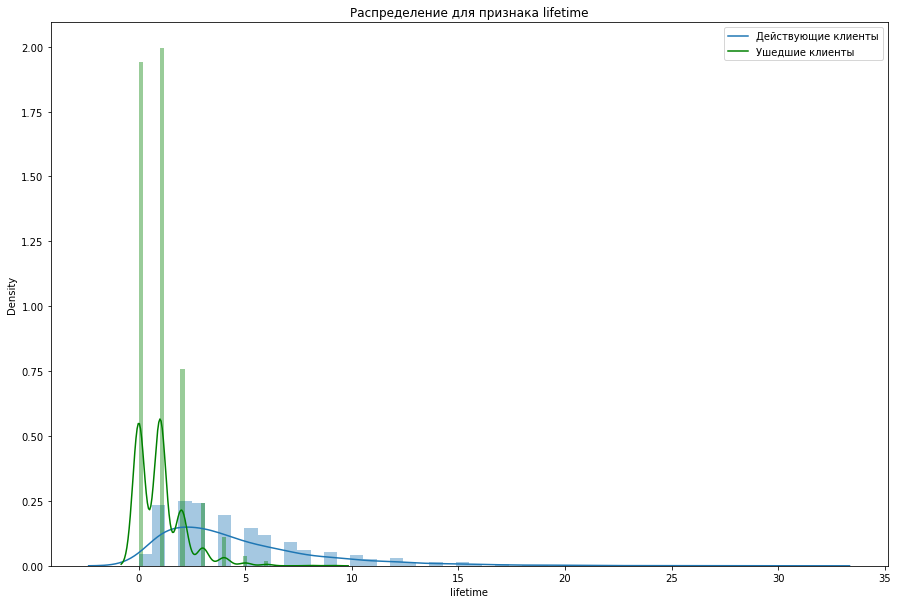

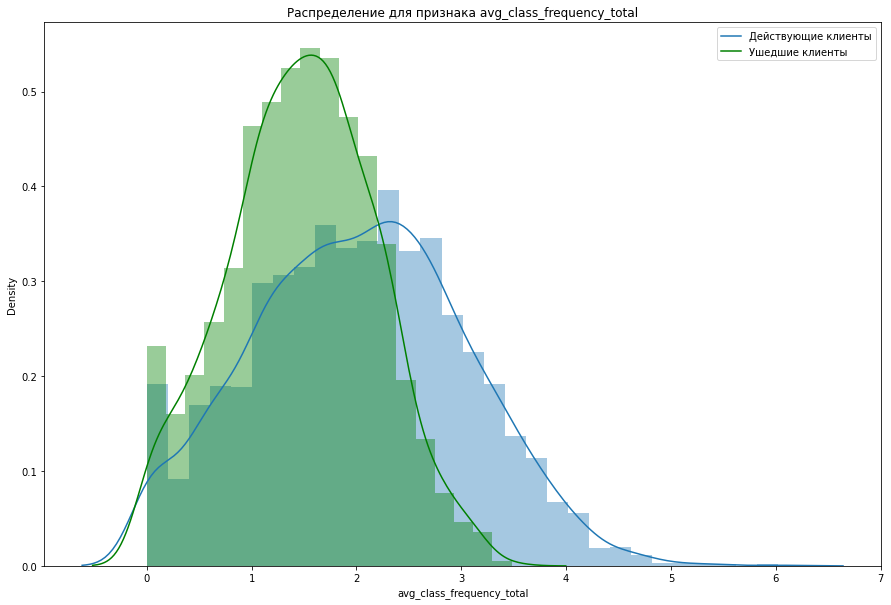

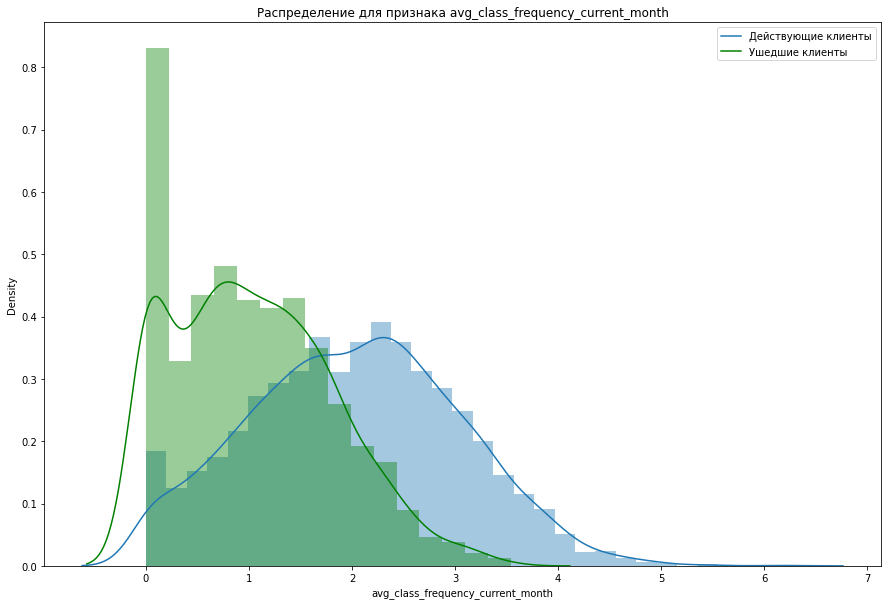

In [14]:
for col in data_hist:
    plt.figure(figsize=(15, 10))
    sns.distplot(current_clients[col])
    sns.distplot(departed_clients[col], color = 'g')
    plt.legend(labels = ('Действующие клиенты', 'Ушедшие клиенты'))
    plt.title('Распределение для признака ' + col)
    plt.show()

**Выводы:**
- ушедшие клиенты моложе действующих
- ушедшие клиенты реже приобретают дополнительные услуги
- ушедшие клиенты покупают, в большинстве случаев, абонемент на 1 месяц (скорее всего, самый короткий из возможных сроков соглашения)
- в основном покидают фитнес-центр те, что посещал его менее 5-и месяцев. Кто превысил эту отметку, условно переходят в число постоянных клиентов
- ушедшие клиенты посещают зал не более 2-х раз в неделю
- есть ушедшие клиенты, которые за месяц не посещали зал вообще, максимум среди ушедших клиентов - 4 раза в неделю

<div class="alert alert-success">
<font size="3"><b>✔️ Комментарий ревьюера ✔️</b></font>
  

Отличная визуализация! Согласна с выводами. 

</div>

## 2.4. Построение матрицы корреляций

In [15]:
cm = data.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Для удобства восприятия построим хитмэп:

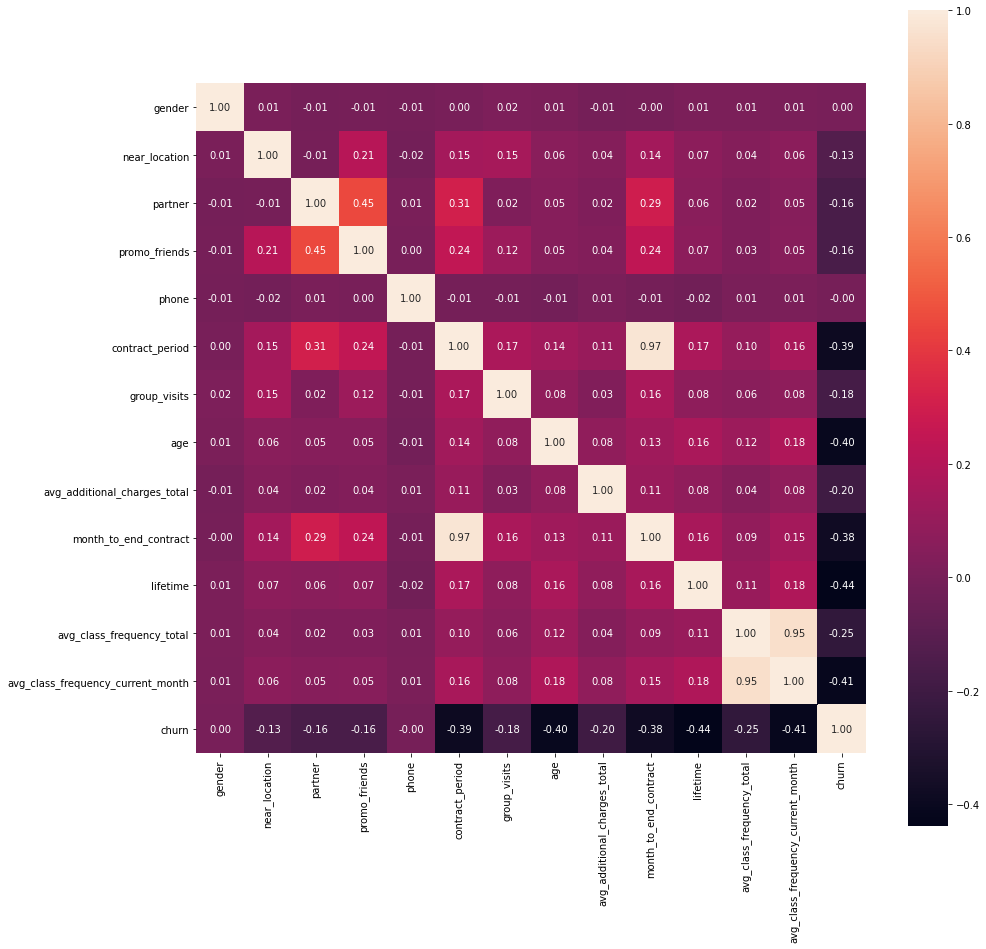

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt = '.2f', square=True)
plt.show()

**Вывод:** наблюдаем "сильную" корреляцию по следующим "сочетаниям":
- длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента (0,97)
- средняя частота посещений в неделю за все время с начала действия абонемента - средняя частота посещений в неделю за предыдущий месяц; (0,95)

Также, прослеживается более "низкая" корреляция по таким "сочетаниям":
- факт первоначальной записи в рамках акции «приведи друга - сотрудник компании-партнёра клуба (0
45)
- длительность текущего действующего абонемента - сотрудник компании-партнёра клуба (0,31)

В целом, в этой зависимости прослеживается логика, здравому смыслу не противоречит.
Возвращаясь к бизнес-задаче, в частности, поиску ответа на вопрос, почему наблюдается отток клиентов (и выручки соответственно), на данной стадии больше всего бросается в глаза то, что есть клиенты, которые приобрели абонемент, но не посещают зал/посещают крайне редко и, как следствие, пролонгация договора с фитнес-центром им неинтересна. Возможно, стоит разработать некий "онбординг" для новичков, чтобы все было максимально понятно и доступно и их, в хорошем смысле, "затягивало" в мир спорта. Также, можно попробовать провести рекламную кампанию из серии "3 персональных тренировки бесплатно" или скидки на дополнительные услуги на период действия первого абонемента, возможно, это сможет удержать "мнительных" клиентов, которые не уверены нужен ли им фитнес, даже оплатив услуги зала.

# Шаг 3. Построение модели прогнозирования оттока клиентов

## 3.1. Разделение данные на обучающую и валидационную выборку функцией train_test_split()

Данные будут разделены на:
- признаки (матрица X),
- целевую переменную (y)

Пропорция выборки будет "общепринятой", т.е. 80/20 (обучающая 80% 'train' и валидационную 20% 'test')

In [17]:
X = data.drop('churn', axis = 1)
y = data['churn']

In [18]:
print('Размер выборки X:', len(X))
print()
print('Размер выборки y:', len(y))

Размер выборки X: 4000

Размер выборки y: 4000


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
print('Размер переменной X_train:', len(X_train))
print()
print('Размер переменной y_train:', len(y_train))
print()
print('Размер переменной X_test:', len(X_test))
print()
print('Размер переменной y_test:', len(y_test))

Размер переменной X_train: 3200

Размер переменной y_train: 3200

Размер переменной X_test: 800

Размер переменной y_test: 800


## 3.2. Обучение модели на train-выборке

### 3.2.1. Логистическая регрессия (переменная lr)

In [21]:
# Обучение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационной набор данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Алгоритм для модели логистической регрессии.
lr_model = LogisticRegression(random_state=0)

# Обучение модели
lr_model.fit(X_train_st, y_train)

# Прогнозирование, с помощью обученной модели
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

### 3.2.2. Случайный лес (переменная rfc)

In [22]:
rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 

# Обучим модель случайного леса.
rfc_model.fit(X_train_st, y_train)

# Воспользуемся уже обученной моделью, чтобы сделать прогнозы.
rfc_predictions = rfc_model.predict(X_test_st) 
rfc_probabilities = rfc_model.predict_proba(X_test_st)[:,1]

## 3.3. Оценка метрик для обоих моделей

**Аннотация к рассматриваемым метрикам:**
- Доля правильных ответов (англ. accuracy)
- Точность (англ. precision)
- Полнота (англ. recall)
- F1_score (показатель "баланса" между метриками
- roc_auc, или площадь под кривой ошибок — AUC-ROC (от англ. Area Under Curve, «площадь под кривой», Receiver Operating Characteristic, «рабочая характеристика приёмника»)

**Важно:** все перечисленные метрики должны "стремиться" к единице, соответственно, чем ближе к единице значение, тем лучше показатели модели

Объявим функцию:

In [23]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [24]:
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


In [25]:
print_all_metrics(y_test, rfc_predictions, rfc_probabilities, title='Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


**Вывод:** метрики для двух выбранных моделей почти идентичны, критическая разница не прослеживается. Тем не менее, единственное различие в метрике Recall (0,83 у регрессии, 0,84 у леса) говорит о том, что модель случайного леса "проявила" себя лучше, следовательно, для решения поставленной задачи данная модель будет "оптимальнее" регрессии.

# Шаг 4. Кластеризация клиентов

## 4.1. Стандартизация данных

In [26]:
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

## 4.2. Построение дендрограммы

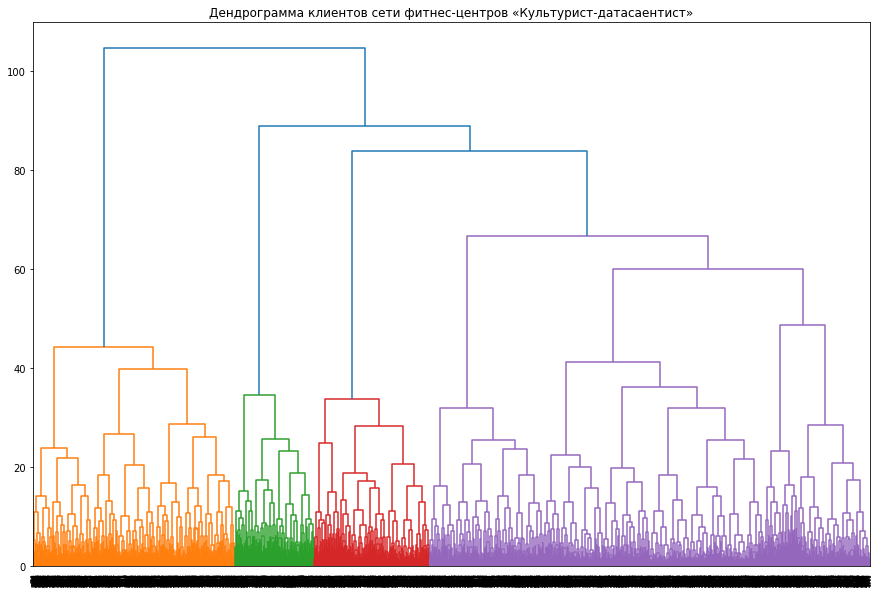

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма клиентов сети фитнес-центров «Культурист-датасаентист»')
plt.show()

## 4.3. Обучение модели кластеризации на основании алгоритма K-Means и прогнозирование кластеров клиентов

Согласно ТЗ/аннотации к проекту за число кластеров принимаем 5. Кроме того, это условие не противоречит тому, о чем "говорит" дендрограмма

In [28]:
k_means = KMeans(n_clusters = 5, random_state=1)

# прогнозируем кластеров для наблюдений
labels = k_means.fit_predict(X_st)

#устанавливаем соответствие между каждым наблюдением и значением кластера 
data['cluster_kmeans'] = labels

## 4.4. Изучение средних значений признаков для кластеров

In [29]:
cluster_mean = data.groupby(['cluster_kmeans']).mean().T #применим транспонирование для удобства чтения
cluster_mean

cluster_kmeans,0,1,2,3,4
gender,0.500960,0.519319,0.498371,0.505426,0.523316
near_location,0.000000,1.000000,0.951140,1.000000,0.862694
partner,0.464491,0.224623,0.739414,0.773643,0.471503
promo_friends,0.078695,0.000000,0.466884,1.000000,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.343570,2.056974,11.511401,2.972093,4.777202
group_visits,0.216891,0.379175,0.543974,0.451163,0.427461
age,28.579655,28.918140,29.964169,29.120930,29.297927
avg_additional_charges_total,136.561586,141.863877,166.325823,141.317434,144.208179
month_to_end_contract,2.197697,1.963982,10.457112,2.778295,4.466321


**Описание средних значений по кластерам:**

**Кластер 0:**
- равное количество мужчин и женщин (50%)
- никто не проживает/работает в непосредственной близости к залу (показатель 0)
- 46% клиентов являются "результатом" партнерской программы
- ~8% клиентов пришли по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет 2,3 месяца
- только 21% клиентов посещает групповые занятия
- средний возраст 29 лет
- средняя выручка по дополнительным услугам составила 137 долларов
- договор в среднем истекает через 2,2 месяца
- лайфтайм чуть менее 3 месяцев
- средняя посещаемость за неделю менее 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 1,56 раза
- отток 42%

**Кластер 1:**
- равное количество мужчин и женщин (51%)
- все проживают/работают в непосредственной близости к залу (показатель 100%)
- 22% клиентов являются "результатом" партнерской программы
- нет клиентов, пришедших по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет 2 месяца
- только 37% клиентов посещает групповые занятия
- средний возраст 29 лет
- средняя выручка по дополнительным услугам составила 141 доллар
- договор в среднем истекает чуть менее, чем через 2 месяца
- лайфтайм 3,3 месяца
- средняя посещаемость за неделю менее 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 1,65 раза
- отток 36%

**Кластер 2:**
- равное количество мужчин и женщин (49%)
- 95% клиентов проживает/работает в непосредственной близости к залу
- 73% клиентов являются "результатом" партнерской программы
- 46% клиентов пришли по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет 1 год
- только 54% клиентов посещает групповые занятия
- средний возраст 30 лет
- средняя выручка по дополнительным услугам составила 166 долларов
- договор в среднем истекает через 10 месяцев
- лайфтайм близок к 5 месяцам
- средняя посещаемость за неделю более 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 2,1 раза
- отток менее 2%

**Кластер 3:**
- равное количество мужчин и женщин (50%)
- 100% клиентов проживает/работает в непосредственной близости к залу
- 77% клиентов являются "результатом" партнерской программы
- 100% клиентов пришли по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет почти 3 месяца
- 45% клиентов посещает групповые занятия
- средний возраст 29 лет
- средняя выручка по дополнительным услугам составила 141 доллар
- договор в среднем истекает через 2,7 месяца
- лайфтайм более 3,5 месяцев
- средняя посещаемость за неделю менее 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 1,73 раза
- отток 25%

**Кластер 4:**
- равное количество мужчин и женщин (52%)
- 86% клиентов проживает/работает в непосредственной близости к залу
- 47% клиентов являются "результатом" партнерской программы
- ~3% клиентов пришли по рекомендации действующего клиента
- никто не оставил свой телефон
- средняя длительность абонемента/договора составляет 4,7 месяцев
- 42% клиентов посещает групповые занятия
- средний возраст 29 лет
- средняя выручка по дополнительным услугам составила 144 доллара
- договор в среднем истекает через 4,5 месяца
- лайфтайм почти 4 месяца
- средняя посещаемость за неделю менее 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 1,72 раза
- отток 26%

## 4.5. Построение распределения признаков для кластеров

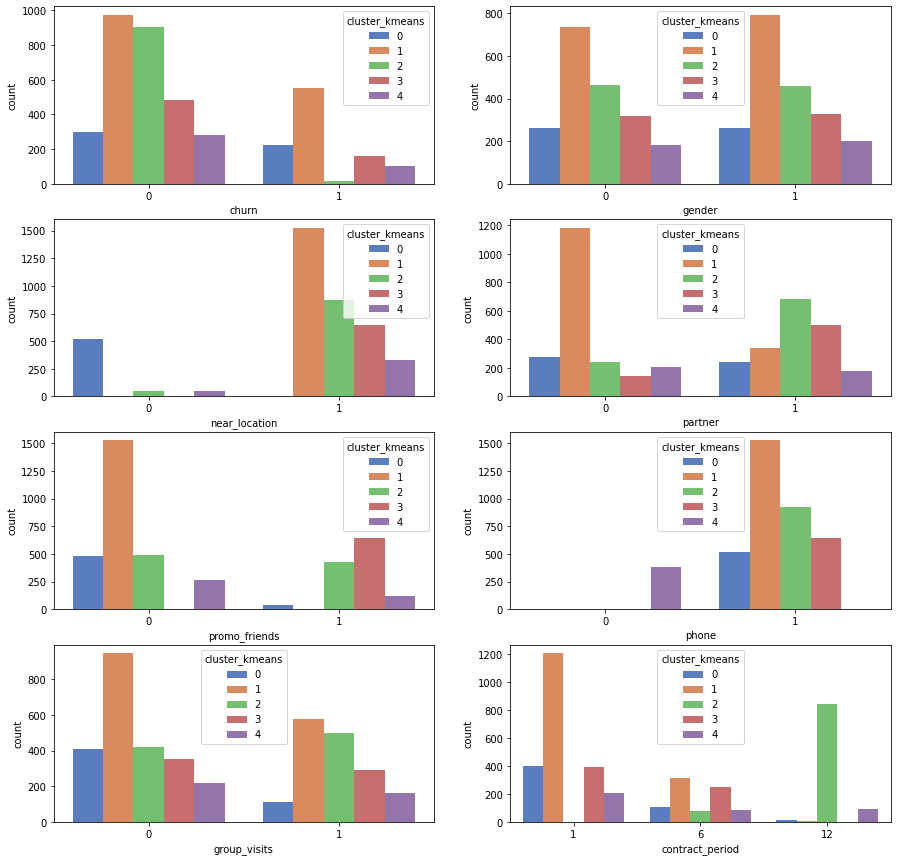

In [30]:
distribution_clusters = ['churn','gender', 'near_location', 'partner', 
       'promo_friends', 'phone', 'group_visits','contract_period'] 


fig , ax = plt.subplots(4,2,figsize=(15,15))

for axis,column in zip(ax.flat, distribution_clusters):
    sns.countplot(x=data[column], hue=data['cluster_kmeans'], palette='muted', ax=axis)

**Вывод:** самый худшие показатели оттока у нулевого кластера - 42% клиентов не задерживаются в клубе и не переходят в условный статус "постоянных клиентов". При сравнению с другими кластерами, по многим показателям нулевой "отстает". Например, по посещаемости (как индивидуальной, так и групповой), лайфтайму, среднему чеку по дополнительным услугам. Также, в этом кластере наблюдается самый "короткий" срок действия абонемента.

Полностью противоположная картина в кластере 2. Отток всего 2% (в целом, это, скорее всего, как-раз люди, у которых изменились обстоятельства и они не нуждаются более в спортивных услугах, чем факт проблемы с удержанием клиента), более долгие договорные отношения и бОльшая прибыль по допуслугам. Посещаемость также выше

## 4.5. Расчет доли оттока

In [31]:
outflow_share = data.groupby('cluster_kmeans').mean().reset_index()
outflow_share['percent'] = outflow_share['churn'] * 100
outflow_share['percent'] = outflow_share['percent'].map('{0:.2f}%'.format)
display(outflow_share[['cluster_kmeans', 'percent']].sort_values(by='percent', ascending=False))

,cluster_kmeans,percent
0,0,42.99%
1,1,36.21%
4,4,26.68%
3,3,25.27%
2,2,1.95%


Доля оттока подтвердила ранее сформулированные преположения: с точки зрения оттока, и, соответственно потери прибыли, наиболее "опасный" кластер с индексом 0 - вероятность оттока 43%, наиболее "стабильный кластер" - с индексом 2, вероятность оттока менее 2%.

# Шаг 5. Рекомендации по итогам исследования

В процессе исследования был составлен "портрет" потребителя, как "идеального", который является постоянным клиентом и приносит прибыль компании, так и "ушедшего", т.е. клиента, который с большой долей вероятности уже не придет за новым абонементом.

**Данные по клиентам, наиболее "расположенным" к оттоку:**
- равное количество мужчин и женщин (50%)
- никто не проживает/работает в непосредственной близости к залу (показатель 0)
- 46% клиентов являются "результатом" партнерской программы
- ~8% клиентов пришли по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет 2,3 месяца
- только 21% клиентов посещает групповые занятия
- средний возраст 29 лет
- средняя выручка по дополнительным услугам составила 137 долларов
- договор в среднем истекает через 2,2 месяца
- лайфтайм чуть менее 3 месяцев
- средняя посещаемость за неделю менее 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 1,56 раза

**Данные по клиентам, менее "расположенным" к оттоку:**
- равное количество мужчин и женщин (49%)
- 95% клиентов проживает/работает в непосредственной близости к залу
- 73% клиентов являются "результатом" партнерской программы
- 46% клиентов пришли по рекомендации действующего клиента
- 100% клиентов оставили свой телефон
- средняя длительность абонемента/договора составляет 1 год
- только 54% клиентов посещает групповые занятия
- средний возраст 30 лет
- средняя выручка по дополнительным услугам составила 166 долларов
- договор в среднем истекает через 10 месяцев
- лайфтайм близок к 5 месяцам
- средняя посещаемость за неделю более 2-х раз
- средняя посещаемость в неделю в разрезе прошлого месяца - 2,1 раза

Видим, что причинами оттока не является пол клиента (очевидно, возможности фитнес-центров адаптированы под интересы как мужчин, так и женщин), факт предоставления контактного телефона (можно исключить обзвоны и навязывание услуг), какого-либо различия по возрасту также не наблюдается.

Также, к оттоку более расположены те, для кого фитнес весьма удален (как время, так и транспортные расходы могли повлиять на такое решение)

Также, стоит отметить, срок действия абонементов: разница между уходящим и постоянным клиентом порядка 5 раз. Групповые занятия чаще посещают постоянные клиенты сети, посещаемость у них тоже выше. Логично, что если новичок редко посещает зал, вероятность приобретения дополнительных услуг крайне мала, поэтому и по показателю "дополнительной прибыли" постоянные клиенты "впереди".

Стоит отметить, что не все из нижеизложенных рекомендаций будут построены сугубо на итогах исследования, где-то причиноследственная связь будет дополнена с точки зрения потенциального потребителя, возможно, она окажется близка с истине.

**Резюмируя:**

- в рамках исследования неоднократно был подмечен факт низкой посещаемости клиентов, которые позднее отказываются от услуг компании. Не исключено, что попадая в клуб люди банально не знают, что делать и их интерес быстро угасает. Что можно сделать: каждому клиенту проводить "онбординг", вне зависимости от срока действия его абонемента, целей, преследуемых клиентом и прочего
- аналогичное предложение и по уходящим клиентам, но имеющим какой-то "стаж" в клубе. Например. если клиент не посещал клуб, скажем, месяц, стоит связаться с ним и узнать о причинах (ненавязчиво!), возможно, ситуация решаема. Можно также предложить разнообразить групповые программы, но имеющихся данных недостаточно, чтобы предположить рентабельность такой рекомендации
- новичкам, которые не посещают клуб или тем, кто близок к отказу от пролонгации абонемента предлагать индивидуальные решения. Например, персональная тренировка со скидкой 30%, один сеанс массажа без доплаты, и.т.п. Кстати, эта рекомендация коррелирует с тем фактом, что уходящие клиенты реже приобретают дополнительные услуги. В теории, можно и удержать клиента и увеличить выручку.
- возможно, нуждается в пересмотре абонементная/договорная система. Видим, что имеются клиенты с лайфтаймом порядка трех месяцев. По имеющимся данным нельзя констатировать эту рекомендацию, как факт, но не исключено, что предлагаются договоры с маленьким сроком действия (условно 1 квартал). На практике, как правило, такие сроки абонемента редко встречаются, а если и бывают, но проигрывают по выгодности годовому абонементу. Склоняюсь эту рекомендацию отнести к "второстепенным", но может быть и здесь есть доля истины. Безусловно, не самая эффективная мотивация для клиента не бросать спорт, т.к. уже оплатил, но в связке с вышеуказанными рекомендациями результат может быть
- при наличии бюджета, разработать приложение (или дополнение к имеющемуся), которое будет информировать о групповых тренировках. Либо, позволит создавать чек-лист (к примеру, за месяц увеличить дистанцию на беговой дорожке в 2 раза), а приложение будет "деликатно" напоминать, на какой стадии клиент
- провести аудит качества услуг, качества оборудования, доступности раздевалок, кулеров и прочего (можно также собрать обратную связь от клиентов, желающих ее предоставить)

## Спасибо за внимание!